# Movielens Case Study 

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importing data sets 
df_rawdata_movies = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY6\movies.dat',sep="::",names=["MovieID","Title","Genres"],engine='python')
df_rawdata_ratings = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY6\ratings.dat',sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
df_rawdata_users = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY6\users.dat',sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
df_rawdata_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [3]:
df_rawdata_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [4]:
df_rawdata_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [5]:
print('shape of movies data set ', df_rawdata_movies.shape)
print('shape of rating data set ', df_rawdata_ratings.shape)
print('shape of user data set ', df_rawdata_users.shape)

shape of movies data set  (3883, 3)
shape of rating data set  (1000209, 4)
shape of user data set  (6040, 5)


Creating New data set with all the 3 data set values merged.

In [6]:
df_Movie_Ratings = df_rawdata_movies.merge(df_rawdata_ratings,on='MovieID',how='inner')
df_Master_Data = df_Movie_Ratings.merge(df_rawdata_users,on="UserID",how='inner')
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [7]:
df_Master_Data.shape

(1000209, 10)

# DATA EXPLORATION 

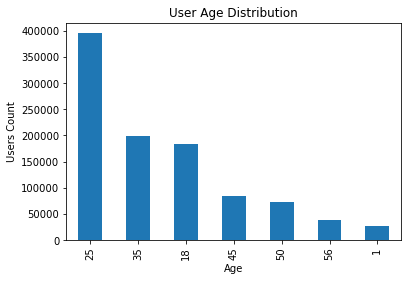

In [8]:
# User Age Distribution
df_Master_Data['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

We can cleary see that Maximum number of Reviews are made by first age group.

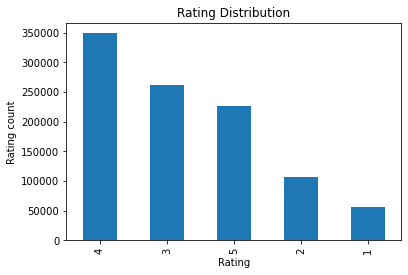

In [9]:
# By Rating Distibution
df_Master_Data['Rating'].value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.title("Rating Distribution")
plt.ylabel('Rating count')
plt.show()

We can cleary see that 4 is the most common rating, showing a good response from the users.

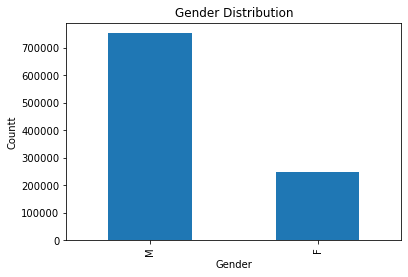

In [10]:
# By gender
df_Master_Data['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.title("Gender Distribution")
plt.ylabel('Countt')
plt.show()

Most of the rating are given by male users

<AxesSubplot:>

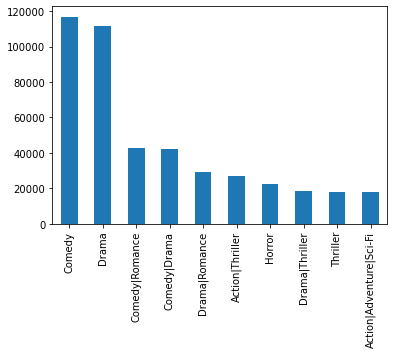

In [11]:
# Plotting by top Ten Genres
df_Master_Data['Genres'].value_counts().head(10).plot(kind='bar')

User rating of the movie Pocahontas (1995)

In [12]:
Pocahontas_rating = df_Master_Data[df_Master_Data['Title'].str.contains('Pocahontas') == True]
Pocahontas_rating.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
56,48,Pocahontas (1995),Animation|Children's|Musical|Romance,6,5,978237570,F,50,9,55117
374,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,978230090,F,35,1,95370
779,48,Pocahontas (1995),Animation|Children's|Musical|Romance,18,4,978155072,F,18,3,95825
1666,48,Pocahontas (1995),Animation|Children's|Musical|Romance,26,3,978141288,M,25,7,23112


In [13]:
Pocahontas_rating.groupby(["Title","Rating"]).size()

Title              Rating
Pocahontas (1995)  1          42
                   2          79
                   3         136
                   4          96
                   5          29
dtype: int64

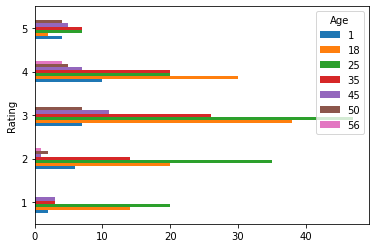

In [14]:
# Movie rating by age group
Pocahontas_rating.groupby(["Rating","Age"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

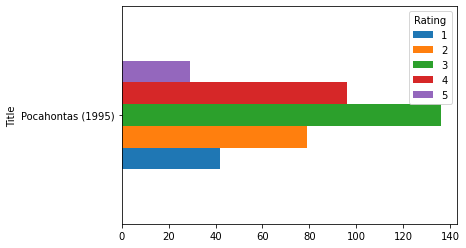

In [15]:
# Movie rating.
Pocahontas_rating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

Top 25 movies by viewership rating

In [16]:
df_Master_Data['Genres'].value_counts().head(10)

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: Genres, dtype: int64

In [17]:
df_Top_25 = df_Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
df_Top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

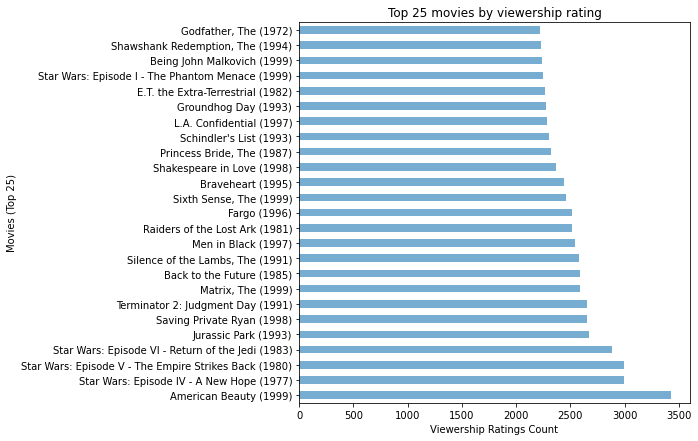

In [18]:
df_Top_25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()

Find the ratings for all the movies reviewed by for a particular user of user id

In [19]:
userId = 2696
userRatingById = df_Master_Data[df_Master_Data["UserID"] == userId]
print(userRatingById.shape)
userRatingById.head()

(20, 10)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


# FEATURE ENGINEERING

In [20]:
# Finding all the unique Geners
df_Genres = df_Master_Data['Genres'].str.split("|")

In [21]:
df_Genres.head()

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
3         [Action, Adventure, Fantasy, Sci-Fi]
4                                 [Drama, War]
Name: Genres, dtype: object

In [22]:
# Creating a list of all the unique Generes 
listGenres = set()
for genre in df_Genres:
    listGenres = listGenres.union(set(genre))

In [23]:
listGenres # List of all the unique genere

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [24]:
ratingsOneHot = df_Master_Data['Genres'].str.get_dummies("|")
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
# Merging the 2 data sets df_df_Master_Data and ratratingsOneHot
df_Master_Data = pd.concat([df_Master_Data,ratingsOneHot],axis=1)

In [26]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


Saving the final data set 

In [27]:
df_Master_Data.to_csv('Final data set.csv')

Determine the features affecting the ratings of any particular movie.

In [28]:
# Creating a new colum with the year for the movies
df_Master_Data[["title","Year"]] = df_Master_Data.Title.str.extract("(.)\s\((.\d+)",expand=True)
df_Master_Data = df_Master_Data.drop(columns=['title'])

In [29]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [30]:
df_Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [31]:
# converting "year" column from object type to intiger type
df_Master_Data['Year'] = df_Master_Data.Year.astype(int)
# Creating a new column with the movie age
df_Master_Data['Movie_Age'] = 2020 - df_Master_Data.Year
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,25
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,25
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,25
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,43
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,27


In [32]:
# Replacing the Male and Female Values with 1 and 0, Changing the type of columns from object to int
df_Master_Data['Gender'] = df_Master_Data.Gender.str.replace('F','1')
df_Master_Data['Gender'] = df_Master_Data.Gender.str.replace('M','0')
df_Master_Data['Gender'] = df_Master_Data.Gender.astype(int)

In [33]:
df_Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,25
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,25
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,25
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,43
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,27


[]

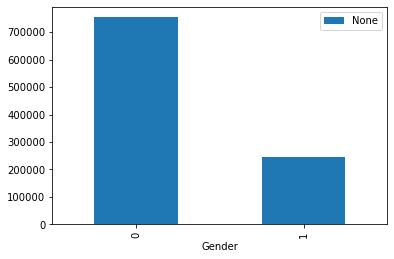

In [34]:
dfGenderAffecting = df_Master_Data.groupby('Gender').size().sort_values(ascending=False)[:25].plot(kind='bar',stacked=False,legend=True)
dfGenderAffecting.plot(kind='bar',stacked=False,legend=True)

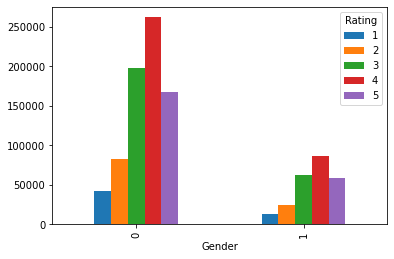

In [35]:
df_Master_Data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

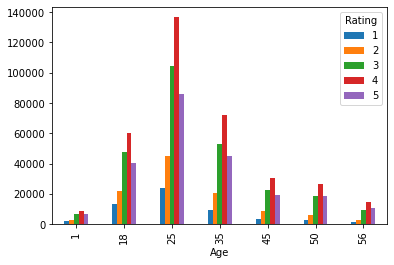

In [36]:
df_Master_Data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

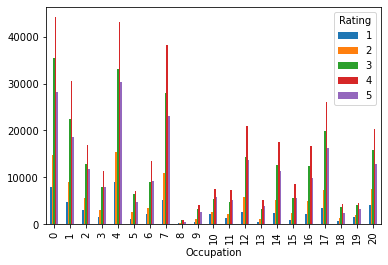

In [37]:
df_Master_Data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()


# MODEL CREATION

In [38]:
# Deeveloping The model on first 500 entries
first_1000 = df_Master_Data[:1000]

In [39]:
# Creating and selectiong features and labels for the model
x_features = first_1000[['MovieID','Age','Occupation']].values
y_labels = first_1000[['Rating']].values

In [40]:
# Creating a Test train split
from sklearn.model_selection import train_test_split

# Test train split 
x_train, x_test, y_train_labels, y_test_labels = train_test_split(x_features,y_labels,test_size=0.33,random_state=42)


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train_labels)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train_labels) * 100, 2)
acc_log

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


36.72

# Support Vector Machines

In [42]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(x_train, y_train_labels)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train_labels) * 100, 2)
acc_svc

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


38.81

# Linear SVC

In [43]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train_labels)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train_labels) * 100, 2)
acc_linear_svc

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


34.63

# K Nearest Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train_labels)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train_labels) * 100, 2)
acc_knn

<ipython-input-44-fffbba7bec1c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train_labels)


59.7

# Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train_labels)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train_labels) * 100, 2)
acc_gaussian

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


39.55

# Perceptron

In [46]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train_labels)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train_labels) * 100, 2)
acc_perceptron

C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


34.33

# Stochastic Gradient Descent

In [47]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train_labels)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train_labels) * 100, 2)
acc_sgd


C:\Users\nkhg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


22.99

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train_labels)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train_labels) * 100, 2)
acc_decision_tree

100.0

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train_labels)
Y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train, y_train_labels) * 100, 2)
acc_random_forest

<ipython-input-49-4d569c37fea8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train_labels)


100.0

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,59.70
4,Naive Bayes,39.55
0,Support Vector Machines,38.81
2,Logistic Regression,36.72
7,Linear SVC,34.63
5,Perceptron,34.33
6,Stochastic Gradient Decent,22.99
